# Storytelling Data Visualization on Exchange Rates

## Introducing the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
exchange_rates = pd.read_csv("euro-daily-hist_1999_2022.csv")

In [2]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6229 entries, 0 to 6228
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6229 non-null   object 
 1   [Australian dollar ]      6229 non-null   object 
 2   [Bulgarian lev ]          5827 non-null   object 
 3   [Brazilian real ]         5961 non-null   object 
 4   [Canadian dollar ]        6229 non-null   object 
 5   [Swiss franc ]            6229 non-null   object 
 6   [Chinese yuan renminbi ]  5961 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6229 non-null   object 
 9   [Danish krone ]           6229 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6229 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6229 non-null   object 
 14  [Croatia

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-01-27,1.5289,1.9558,5.5104,1.4479,1.0017,7.3690,NaN,23.826,7.4378,...,4.8965,NaN,11.2108,1.4277,NaN,NaN,35.7020,20.4365,1.0865,18.7185
1,2023-01-26,1.5308,1.9558,5.5572,1.4568,1.0002,7.3893,NaN,23.818,7.4383,...,4.8818,NaN,11.1763,1.4292,NaN,NaN,35.6870,20.4961,1.0895,18.6127
2,2023-01-25,1.5360,1.9558,5.5690,1.4544,1.0020,7.3778,NaN,23.808,7.4381,...,4.9035,NaN,11.1335,1.4307,NaN,NaN,35.7180,20.4658,1.0878,18.6745
3,2023-01-24,1.5470,1.9558,5.6164,1.4517,1.0053,7.3642,NaN,23.874,7.4399,...,4.9171,NaN,11.0995,1.4337,NaN,NaN,35.6090,20.4234,1.0858,18.7687
4,2023-01-23,1.5529,1.9558,5.6372,1.4523,1.0013,7.3730,NaN,23.881,7.4393,...,4.9202,NaN,11.1183,1.4328,NaN,NaN,35.6300,20.4478,1.0871,18.6597


## Doing Initial Data Cleaning

In [4]:
#We rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
#We change the Time column to a datetime data type.
#We sort the values by Time in ascending order.
#We reset the index (and drop the initial index).

exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
#Isolate the Time and the US_dollar columns. Assign them to a different variable named euro_to_dollar
euro_to_dollar = exchange_rates[["Time", "US_dollar"]]

In [6]:
exchange_rates["US_dollar"].value_counts()

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.3818     1
1.3591     1
1.3405     1
1.3580     1
1.0865     1
Name: US_dollar, Length: 3718, dtype: int64

In [7]:
#Drop all the rows where the - character appears in the US_dollar column
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != "-"]

In [8]:
#Convert the US_dollar column to a float data type.
euro_to_dollar["US_dollar"] = euro_to_dollar["US_dollar"].astype(float) 

## Rolling Mean

In [9]:
euro_to_dollar["rolling_mean"] = euro_to_dollar["US_dollar"].rolling(window=30).mean()

In [10]:
euro_to_dollar["rolling_mean"].describe()

count    6138.000000
mean        1.192806
std         0.157970
min         0.849797
25%         1.098368
50%         1.189018
75%         1.311188
max         1.574333
Name: rolling_mean, dtype: float64

## Idea for Data Storytelling

We can compare how the euro-dollar rate changed under the last four US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), Donald Trump (2017-2021) and Joe Biden (2021-)).

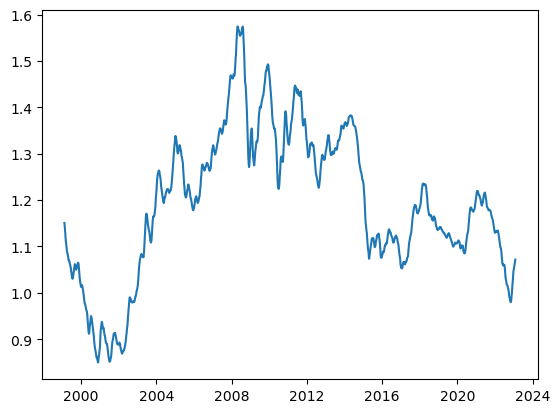

In [11]:
plt.plot(euro_to_dollar["Time"], euro_to_dollar['rolling_mean'])
plt.show()

First, let's plot four different figures, each one representing the dynamic in currency exnchange (USD/EUR) during the presidency of each of the last four US presidents.

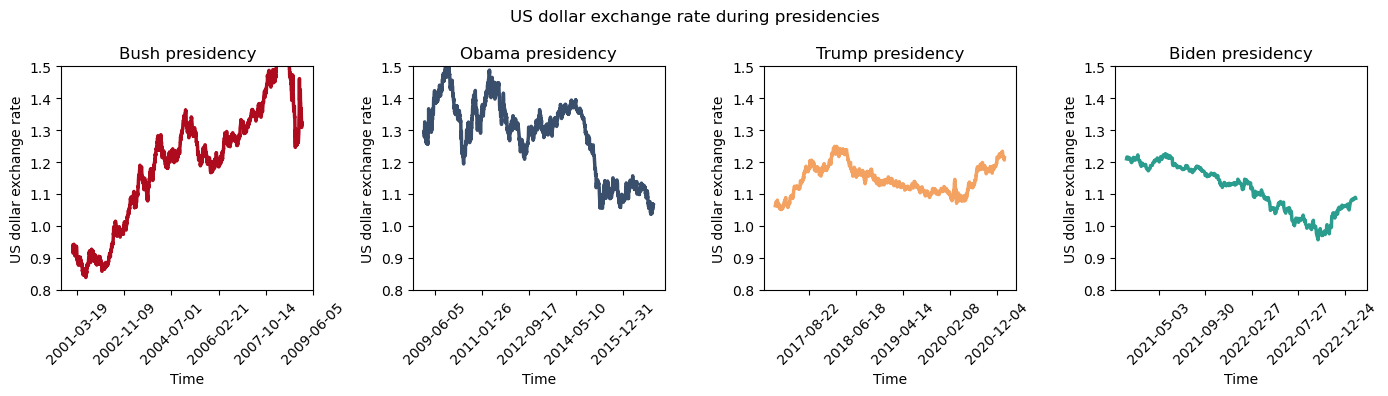

In [12]:
from matplotlib.ticker import MaxNLocator

# define the start and end dates for each presidency
bush_start = "2001-01-20"
bush_end = "2009-01-20"
obama_start = "2009-01-20"
obama_end = "2017-01-20"
trump_start = "2017-01-20"
trump_end = "2021-01-20"
biden_start = "2021-01-20"
biden_end = "2025-01-20" #assuming presidency is 4 years

# create a figure with four subplots arranged in a row
fig, axs = plt.subplots(1, 4, figsize=(14, 4))

# plot the data for each presidency and set the same y-axis scale
for i, (start_date, end_date) in enumerate([(bush_start, bush_end), (obama_start, obama_end), (trump_start, trump_end), (biden_start, biden_end)]):
    sub_df = euro_to_dollar[(euro_to_dollar["Time"] >= start_date) & (euro_to_dollar["Time"] < end_date)]
    axs[i].plot(sub_df["Time"], sub_df["US_dollar"], color=["#af0b1e", "#3a4f6c", "#f4a261", "#2a9d8f"][i], linewidth=2.5)
    axs[i].set_title(["Bush presidency", "Obama presidency", "Trump presidency", "Biden presidency"][i])
    axs[i].set_ylim([0.8, 1.5])
    
    # rotate x-axis labels and adjust number of ticks based on range of dates
    axs[i].tick_params(axis='x', labelrotation=45)
    ax_locator = MaxNLocator(nbins=6, prune="both")
    axs[i].xaxis.set_major_locator(ax_locator)

# set the x and y labels for all subplots
for ax in axs.flat:
    ax.set(xlabel="Time", ylabel="US dollar exchange rate")

# set the title for the figure
fig.suptitle("US dollar exchange rate during presidencies")

# adjust the spacing between subplots
fig.tight_layout()

# display the plot
plt.show()

Finally, let's create an interesting story by combining them into one plot.

In [13]:
import matplotlib.style as style
style.use('fivethirtyeight')

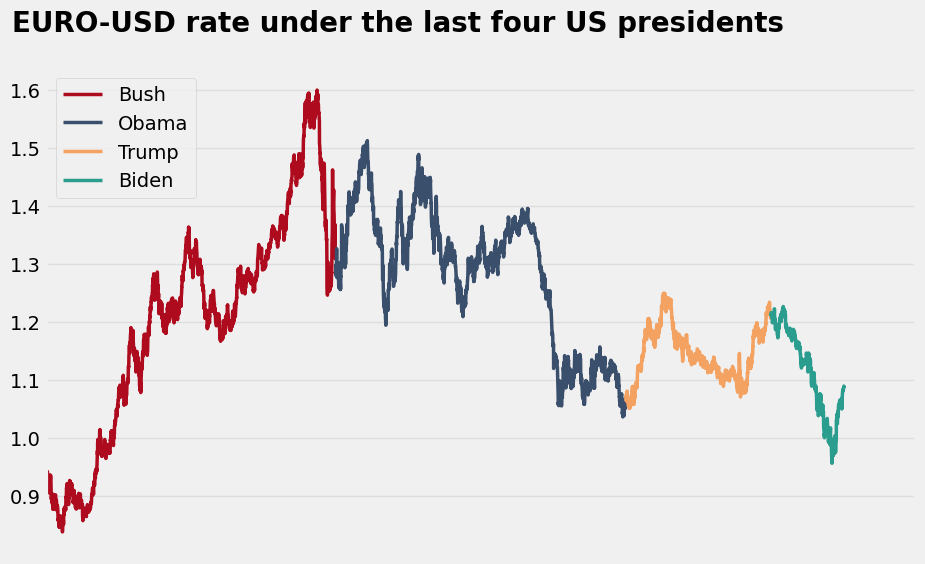

In [14]:
# define the start and end dates for each presidency as datetime objects
bush_start = pd.to_datetime("2001-01-20")
bush_end = pd.to_datetime("2009-01-20")
obama_start = pd.to_datetime("2009-01-20")
obama_end = pd.to_datetime("2017-01-20")
trump_start = pd.to_datetime("2017-01-20")
trump_end = pd.to_datetime("2021-01-20")
biden_start = pd.to_datetime("2021-01-20")
biden_end = pd.to_datetime("2025-01-20")

style.use('fivethirtyeight')

# create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# plot the data for each presidency
for i, (start_date, end_date) in enumerate([(bush_start, bush_end), (obama_start, obama_end), (trump_start, trump_end), (biden_start, biden_end)]):
    sub_df = euro_to_dollar[(euro_to_dollar["Time"] >= start_date) & (euro_to_dollar["Time"] < end_date)]
    ax.plot(sub_df["Time"], sub_df["US_dollar"], color=["#af0b1e", "#3a4f6c", "#f4a261", "#2a9d8f"][i], linewidth=2.5, label=["Bush", "Obama", "Trump", "Biden"][i])

# set the x-axis limits for the subplot
ax.set_xlim([bush_start, biden_end])

# set the x-ticks to be the same for the subplot
ax.set_xticks(pd.date_range(bush_start, biden_end, freq="YS"))

# rotate x-axis labels
ax.tick_params(axis='x', labelrotation=45)

# add a legend to the subplot
ax.legend(loc='upper left')

ax.grid(alpha=0.5)
ax.set_xticks([])
ax.text(11000, 1.7, 'EURO-USD rate under the last four US presidents',
         fontsize=20, weight='bold')
# display the plot
plt.show()